In [ ]:
'''
 * Copyright (c) 2008 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''



$$b = \lfloor \alpha \rfloor / \alpha$$

This equation appears to be from Example 7.10 about generating gamma variables, where they're discussing the optimal choice of b when β = 1. The ⌊α⌋ notation denotes the floor function (integer part) of α.

Would you like me to convert any other mathematical expressions from the image as well?


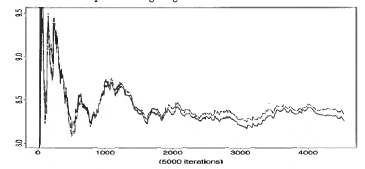
**Fig. 7.1.** Convergence of Accept-Reject (solid line) and Metropolis-Hastings (dashed line) estimators to $E_y[X_7] = 838$, for $a = 248$ based on the same sequence $y_1, y_2, \dots$ simulated from $Ga(2, 2/248)$. The number of acceptances in $[1.27]$ is then random. The final values of the estimators are $8.25$ for $[4.27]$ and $82$ for $[4.20]$.

For Algorithm A.26 - Gamma Metropolis-Hastings:
1. Generate Y:
$$Y_i \sim Ga(\lfloor\alpha\rfloor, \alpha/\lfloor\alpha\rfloor)$$

2. The acceptance probability:
$$X^{(i+1)} = \begin{cases} 
Y_i & \text{with probability } \theta_i \\
X^{(i)} & \text{otherwise}
\end{cases}$$

Where θᵢ is:
$$\theta_i = \min\left[\left(\frac{Y_i}{X^{(i)}}\right)^{\alpha-\lfloor\alpha\rfloor}\exp\left(\frac{X^{(i)}-Y_i}{\alpha}\right), 1\right]$$

For Algorithm A.27 - Gamma Accept-Reject:
1. Generate V:
$$V \sim Ga(\lfloor\alpha\rfloor, \alpha/\lfloor\alpha\rfloor)$$

2. Accept X = V with probability:
$$\left(\frac{v}{\alpha}\exp\left(-\frac{v}{\alpha}\right)\right)^{\alpha-\lfloor\alpha\rfloor}$$

The constraint mentioned:
$$\exp(\alpha/e)/e > \alpha/e$$

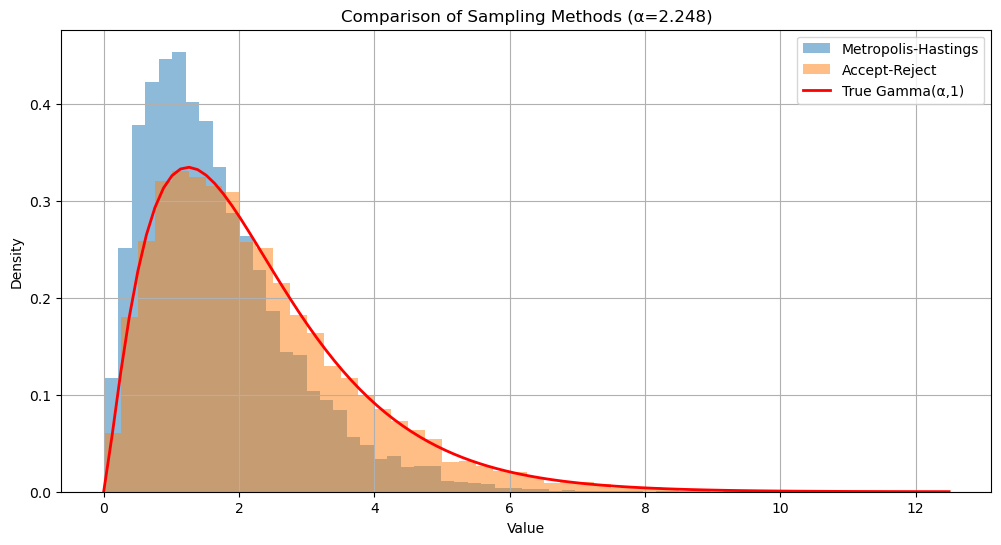


Summary Statistics:
Method               Mean       Variance  
----------------------------------------
Metropolis-Hastings  1.6725 1.2414
Accept-Reject        2.2456 2.2203
True Values          2.2480 2.2480


In [1]:
import numpy as np
from typing import List, Tuple

def gamma_metropolis_hastings(alpha: float, n_samples: int, burn_in: int = 1000) -> List[float]:
    """
    Implementation of Gamma Metropolis-Hastings algorithm (Algorithm A.26)
    
    Args:
        alpha: Shape parameter of the gamma distribution
        n_samples: Number of samples to generate
        burn_in: Number of initial samples to discard
        
    Returns:
        List of generated samples from Gamma(alpha,1) distribution
    """
    # Initialize storage for samples
    samples = []
    
    # Initial value - using a reasonable starting point
    x_current = alpha
    
    # Floor of alpha used multiple times
    alpha_floor = np.floor(alpha)
    
    for i in range(n_samples + burn_in):
        # Step 1: Generate Y from Gamma(⌊α⌋, α/⌊α⌋)
        y = np.random.gamma(alpha_floor, alpha/alpha_floor)
        
        # Step 2: Calculate acceptance probability theta
        ratio = y / x_current
        exponent = alpha - alpha_floor
        exp_term = np.exp((x_current - y) / alpha)
        theta = min((ratio ** exponent) * exp_term, 1)
        
        # Accept or reject
        if np.random.random() < theta:
            x_current = y
            
        # Store sample after burn-in period
        if i >= burn_in:
            samples.append(x_current)
    
    return samples

def gamma_accept_reject(alpha: float, n_samples: int) -> List[float]:
    """
    Implementation of Gamma Accept-Reject algorithm (Algorithm A.27)
    
    Args:
        alpha: Shape parameter of the gamma distribution
        n_samples: Number of samples to generate
        
    Returns:
        List of generated samples from Gamma(alpha,1) distribution
    """
    samples = []
    alpha_floor = np.floor(alpha)
    
    while len(samples) < n_samples:
        # Step 1: Generate V from Gamma(⌊α⌋, α/⌊α⌋)
        v = np.random.gamma(alpha_floor, alpha/alpha_floor)
        
        # Step 2: Calculate acceptance probability
        accept_prob = ((v/alpha) * np.exp(-v/alpha)) ** (alpha - alpha_floor)
        
        # Accept or reject
        if np.random.random() < accept_prob:
            samples.append(v)
    
    return samples

def compare_methods(alpha: float, n_samples: int) -> Tuple[List[float], List[float]]:
    """
    Compare both methods and return samples from each
    
    Args:
        alpha: Shape parameter
        n_samples: Number of samples to generate
        
    Returns:
        Tuple of (metropolis_samples, accept_reject_samples)
    """
    # Verify the condition for Accept-Reject method
    if np.exp(alpha/np.e)/np.e <= alpha/np.e:
        raise ValueError("Alpha value doesn't satisfy required condition for Accept-Reject method")
    
    mh_samples = gamma_metropolis_hastings(alpha, n_samples)
    ar_samples = gamma_accept_reject(alpha, n_samples)
    
    return mh_samples, ar_samples

# Example usage and testing
if __name__ == "__main__":
    import matplotlib.pyplot as plt
    from scipy.stats import gamma
    
    # Test parameters
    alpha = 2.248
    n_samples = 10000
    
    # Generate samples using both methods
    mh_samples, ar_samples = compare_methods(alpha, n_samples)
    
    # Create comparison plots
    plt.figure(figsize=(12, 6))
    
    # Histogram of samples
    plt.hist(mh_samples, bins=50, density=True, alpha=0.5, label='Metropolis-Hastings')
    plt.hist(ar_samples, bins=50, density=True, alpha=0.5, label='Accept-Reject')
    
    # True density
    x = np.linspace(0, max(max(mh_samples), max(ar_samples)), 100)
    plt.plot(x, gamma.pdf(x, alpha), 'r-', lw=2, label='True Gamma(α,1)')
    
    plt.title(f'Comparison of Sampling Methods (α={alpha})')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Print summary statistics
    print("\nSummary Statistics:")
    print(f"{'Method':20} {'Mean':10} {'Variance':10}")
    print("-" * 40)
    print(f"{'Metropolis-Hastings':20} {np.mean(mh_samples):.4f} {np.var(mh_samples):.4f}")
    print(f"{'Accept-Reject':20} {np.mean(ar_samples):.4f} {np.var(ar_samples):.4f}")
    print(f"{'True Values':20} {alpha:.4f} {alpha:.4f}")

In [2]:
import math
import random
from typing import List, Tuple

def floor(x: float) -> int:
    """Simple floor function implementation"""
    return int(x // 1)

def exp(x: float) -> float:
    """Simple exponential function implementation"""
    return math.exp(x)

def generate_gamma_basic(k: int, theta: float) -> float:
    """
    Generate a random variable from Gamma(k, theta) for integer k
    Using sum of exponential random variables method
    """
    result = 0
    for _ in range(k):
        # Generate exponential random variable using inverse transform
        u = random.random()
        result -= theta * math.log(u)
    return result

def gamma_metropolis_hastings(alpha: float, n_samples: int, burn_in: int = 1000) -> List[float]:
    """
    Implementation of Gamma Metropolis-Hastings algorithm without numpy
    
    Args:
        alpha: Shape parameter of gamma distribution
        n_samples: Number of samples to generate
        burn_in: Number of initial samples to discard
        
    Returns:
        List of generated samples from Gamma(alpha,1) distribution
    """
    samples = []
    x_current = alpha  # Initial value
    alpha_floor = floor(alpha)
    
    for i in range(n_samples + burn_in):
        # Generate Y from Gamma(⌊α⌋, α/⌊α⌋)
        y = generate_gamma_basic(alpha_floor, alpha/alpha_floor)
        
        # Calculate acceptance probability theta
        if x_current > 0 and y > 0:  # Avoid division by zero and log of negative
            ratio = y / x_current
            exponent = alpha - alpha_floor
            exp_term = exp((x_current - y) / alpha)
            theta = min((ratio ** exponent) * exp_term, 1)
        else:
            theta = 0
        
        # Accept or reject
        if random.random() < theta:
            x_current = y
            
        # Store sample after burn-in period
        if i >= burn_in:
            samples.append(x_current)
    
    return samples

def gamma_accept_reject(alpha: float, n_samples: int) -> List[float]:
    """
    Implementation of Gamma Accept-Reject algorithm without numpy
    
    Args:
        alpha: Shape parameter of gamma distribution
        n_samples: Number of samples to generate
        
    Returns:
        List of generated samples from Gamma(alpha,1) distribution
    """
    samples = []
    alpha_floor = floor(alpha)
    
    while len(samples) < n_samples:
        # Generate V from Gamma(⌊α⌋, α/⌊α⌋)
        v = generate_gamma_basic(alpha_floor, alpha/alpha_floor)
        
        # Calculate acceptance probability
        if v > 0:  # Avoid log of negative number
            accept_prob = ((v/alpha) * exp(-v/alpha)) ** (alpha - alpha_floor)
        else:
            accept_prob = 0
        
        # Accept or reject
        if random.random() < accept_prob:
            samples.append(v)
    
    return samples

def compare_methods(alpha: float, n_samples: int) -> Tuple[List[float], List[float]]:
    """
    Compare both methods and return samples from each
    
    Args:
        alpha: Shape parameter
        n_samples: Number of samples to generate
        
    Returns:
        Tuple of (metropolis_samples, accept_reject_samples)
    """
    # Verify the condition for Accept-Reject method
    if exp(alpha/math.e)/math.e <= alpha/math.e:
        raise ValueError("Alpha value doesn't satisfy required condition for Accept-Reject method")
    
    mh_samples = gamma_metropolis_hastings(alpha, n_samples)
    ar_samples = gamma_accept_reject(alpha, n_samples)
    
    return mh_samples, ar_samples

def calculate_statistics(samples: List[float]) -> Tuple[float, float]:
    """Calculate mean and variance of samples"""
    n = len(samples)
    if n == 0:
        return 0, 0
        
    mean = sum(samples) / n
    variance = sum((x - mean) ** 2 for x in samples) / (n - 1)
    return mean, variance

if __name__ == "__main__":
    # Test parameters
    alpha = 2.248
    n_samples = 1000
    
    # Generate samples using both methods
    mh_samples, ar_samples = compare_methods(alpha, n_samples)
    
    # Print summary statistics
    print("\nSummary Statistics:")
    print(f"{'Method':20} {'Mean':10} {'Variance':10}")
    print("-" * 40)
    
    mh_mean, mh_var = calculate_statistics(mh_samples)
    ar_mean, ar_var = calculate_statistics(ar_samples)
    
    print(f"{'Metropolis-Hastings':20} {mh_mean:.4f} {mh_var:.4f}")
    print(f"{'Accept-Reject':20} {ar_mean:.4f} {ar_var:.4f}")
    print(f"{'True Values':20} {alpha:.4f} {alpha:.4f}")


Summary Statistics:
Method               Mean       Variance  
----------------------------------------
Metropolis-Hastings  1.6425 1.1332
Accept-Reject        2.2001 2.1180
True Values          2.2480 2.2480


In [4]:
import math
import random
from typing import List, Tuple

def floor(x: float) -> int:
    return int(x // 1)

def exp(x: float) -> float:
    return math.exp(x)

def generate_gamma_basic(k: int, theta: float) -> float:
    """Generate gamma random variable for integer k"""
    result = 0
    for _ in range(k):
        u = random.random()
        result -= theta * math.log(u)
    return result

def gamma_metropolis_hastings(alpha: float, n_samples: int, burn_in: int = 1000) -> List[float]:
    """Metropolis-Hastings algorithm for gamma sampling"""
    samples = []
    x_current = alpha
    alpha_floor = floor(alpha)
    
    for i in range(n_samples + burn_in):
        y = generate_gamma_basic(alpha_floor, alpha/alpha_floor)
        
        if x_current > 0 and y > 0:
            ratio = y / x_current
            exponent = alpha - alpha_floor
            exp_term = exp((x_current - y) / alpha)
            theta = min((ratio ** exponent) * exp_term, 1)
        else:
            theta = 0
        
        if random.random() < theta:
            x_current = y
            
        if i >= burn_in:
            samples.append(x_current)
    
    return samples

def gamma_accept_reject(alpha: float, n_samples: int) -> List[float]:
    """Accept-Reject algorithm for gamma sampling"""
    samples = []
    alpha_floor = floor(alpha)
    
    while len(samples) < n_samples:
        v = generate_gamma_basic(alpha_floor, alpha/alpha_floor)
        
        if v > 0:
            accept_prob = ((v/alpha) * exp(-v/alpha)) ** (alpha - alpha_floor)
        else:
            accept_prob = 0
        
        if random.random() < accept_prob:
            samples.append(v)
    
    return samples

def create_histogram(samples: List[float], n_bins: int) -> Tuple[List[int], float, float]:
    """Create histogram data from samples"""
    min_val = min(samples)
    max_val = max(samples)
    bin_width = (max_val - min_val) / n_bins
    bins = [0] * n_bins
    
    for sample in samples:
        bin_idx = min(int((sample - min_val) / bin_width), n_bins - 1)
        bins[bin_idx] += 1
    
    return bins, min_val, max_val

def plot_ascii_histogram(samples1: List[float], samples2: List[float], 
                        width: int = 60, height: int = 20, n_bins: int = 30):
    """Plot ASCII histogram comparing two distributions"""
    # Create histograms
    hist1, min1, max1 = create_histogram(samples1, n_bins)
    hist2, min2, max2 = create_histogram(samples2, n_bins)
    
    # Normalize to height
    max_count = max(max(hist1), max(hist2))
    hist1_norm = [int(h * height / max_count) for h in hist1]
    hist2_norm = [int(h * height / max_count) for h in hist2]
    
    # Create the plot
    print("\nDistribution Comparison (M-H: '#', Accept-Reject: '*')")
    print("-" * (width + 2))
    
    for row in range(height-1, -1, -1):
        line = "|"
        for bin_idx in range(n_bins):
            if hist1_norm[bin_idx] > row and hist2_norm[bin_idx] > row:
                line += "@"
            elif hist1_norm[bin_idx] > row:
                line += "#"
            elif hist2_norm[bin_idx] > row:
                line += "*"
            else:
                line += " "
        line += "|"
        print(line)
    
    print("-" * (width + 2))

def calculate_statistics(samples: List[float]) -> Tuple[float, float]:
    """Calculate mean and variance of samples"""
    n = len(samples)
    if n == 0:
        return 0, 0
    
    mean = sum(samples) / n
    variance = sum((x - mean) ** 2 for x in samples) / (n - 1)
    return mean, variance

if __name__ == "__main__":
    # Test parameters
    alpha = 2.248
    n_samples = 1000
    
    # Generate samples
    print(f"Generating samples for α = {alpha}...")
    mh_samples = gamma_metropolis_hastings(alpha, n_samples)
    ar_samples = gamma_accept_reject(alpha, n_samples)
    
    # Plot histogram
    plot_ascii_histogram(mh_samples, ar_samples)
    
    # Print statistics
    mh_mean, mh_var = calculate_statistics(mh_samples)
    ar_mean, ar_var = calculate_statistics(ar_samples)
    
    print("\nSummary Statistics:")
    print(f"{'Method':20} {'Mean':10} {'Variance':10}")
    print("-" * 40)
    print(f"{'Metropolis-Hastings':20} {mh_mean:.4f} {mh_var:.4f}")
    print(f"{'Accept-Reject':20} {ar_mean:.4f} {ar_var:.4f}")
    print(f"{'True Values':20} {alpha:.4f} {alpha:.4f}")

Generating samples for α = 2.248...

Distribution Comparison (M-H: '#', Accept-Reject: '*')
--------------------------------------------------------------
|  *                           |
| **                           |
| **                           |
| **                           |
| **                           |
| ** *                         |
| ****                         |
| **@*                         |
| **@*                         |
| **@@@                        |
|**@@@@#                       |
|**@@@@##                      |
|**@@@@## #                    |
|*@@@@@@###                    |
|*@@@@@@###                    |
|*@@@@@@@##                    |
|@@@@@@@@####                  |
|@@@@@@@@@@### #               |
|@@@@@@@@@@### ##              |
|@@@@@@@@@@@@@#####            |
--------------------------------------------------------------

Summary Statistics:
Method               Mean       Variance  
----------------------------------------
Metropolis-Hastin

Generating samples for α = 2.248...


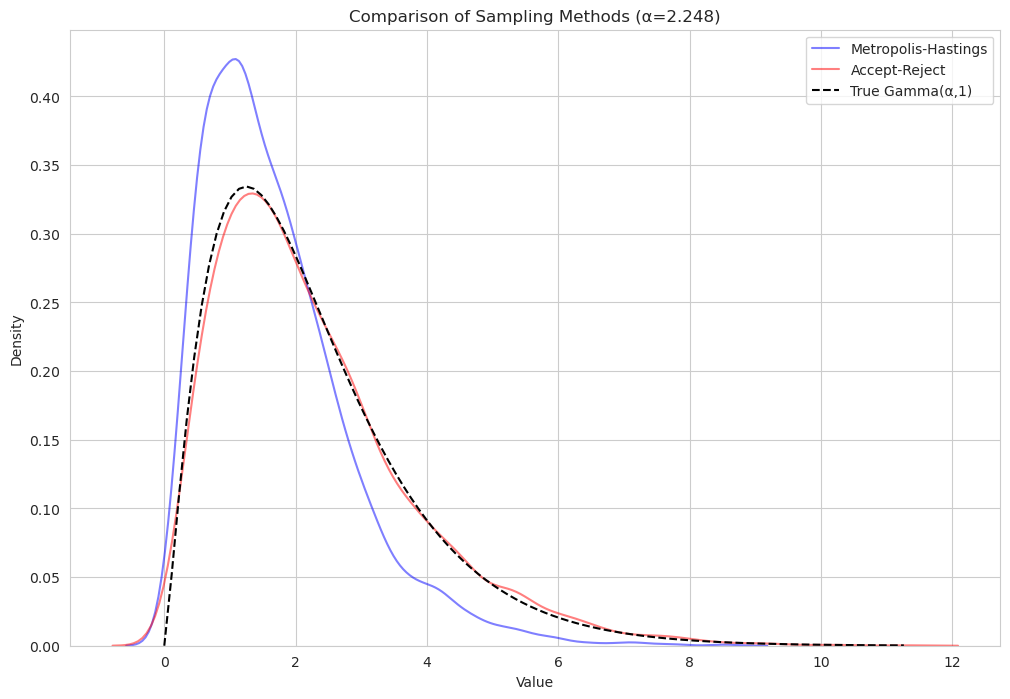

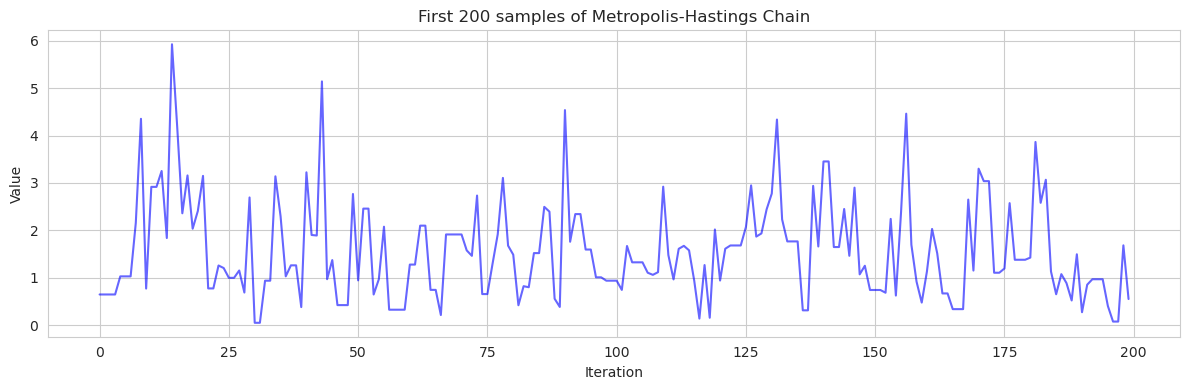


Summary Statistics:
Method               Mean       Variance  
----------------------------------------
Metropolis-Hastings  1.6876 1.2533
Accept-Reject        2.2675 2.2797
True Values          2.2480 2.2480


In [5]:
import math
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gamma
from typing import List, Tuple

def floor(x: float) -> int:
    return int(x // 1)

def exp(x: float) -> float:
    return math.exp(x)

def generate_gamma_basic(k: int, theta: float) -> float:
    """Generate gamma random variable for integer k"""
    result = 0
    for _ in range(k):
        u = random.random()
        result -= theta * math.log(u)
    return result

def gamma_metropolis_hastings(alpha: float, n_samples: int, burn_in: int = 1000) -> List[float]:
    """Metropolis-Hastings algorithm for gamma sampling"""
    samples = []
    x_current = alpha
    alpha_floor = floor(alpha)
    
    for i in range(n_samples + burn_in):
        y = generate_gamma_basic(alpha_floor, alpha/alpha_floor)
        
        if x_current > 0 and y > 0:
            ratio = y / x_current
            exponent = alpha - alpha_floor
            exp_term = exp((x_current - y) / alpha)
            theta = min((ratio ** exponent) * exp_term, 1)
        else:
            theta = 0
        
        if random.random() < theta:
            x_current = y
            
        if i >= burn_in:
            samples.append(x_current)
    
    return samples

def gamma_accept_reject(alpha: float, n_samples: int) -> List[float]:
    """Accept-Reject algorithm for gamma sampling"""
    samples = []
    alpha_floor = floor(alpha)
    
    while len(samples) < n_samples:
        v = generate_gamma_basic(alpha_floor, alpha/alpha_floor)
        
        if v > 0:
            accept_prob = ((v/alpha) * exp(-v/alpha)) ** (alpha - alpha_floor)
        else:
            accept_prob = 0
        
        if random.random() < accept_prob:
            samples.append(v)
    
    return samples

def plot_distributions(mh_samples: List[float], ar_samples: List[float], alpha: float):
    """Plot distributions using seaborn"""
    # Set the style
    sns.set_style("whitegrid")
    plt.figure(figsize=(12, 8))
    
    # Create a KDE plot for both distributions
    sns.kdeplot(data=mh_samples, label='Metropolis-Hastings', color='blue', alpha=0.5)
    sns.kdeplot(data=ar_samples, label='Accept-Reject', color='red', alpha=0.5)
    
    # Add the true distribution
    x = np.linspace(0, max(max(mh_samples), max(ar_samples)), 100)
    plt.plot(x, gamma.pdf(x, a=alpha), 'k--', label='True Gamma(α,1)')
    
    # Add labels and title
    plt.title(f'Comparison of Sampling Methods (α={alpha})')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    
    # Add a subplot for trace plot of Metropolis-Hastings
    plt.figure(figsize=(12, 4))
    plt.plot(mh_samples[:200], color='blue', alpha=0.6)
    plt.title('First 200 samples of Metropolis-Hastings Chain')
    plt.xlabel('Iteration')
    plt.ylabel('Value')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

def calculate_statistics(samples: List[float]) -> Tuple[float, float]:
    """Calculate mean and variance of samples"""
    n = len(samples)
    if n == 0:
        return 0, 0
    
    mean = sum(samples) / n
    variance = sum((x - mean) ** 2 for x in samples) / (n - 1)
    return mean, variance

if __name__ == "__main__":
    # Set random seed for reproducibility
    random.seed(42)
    
    # Test parameters
    alpha = 2.248
    n_samples = 5000
    
    # Generate samples
    print(f"Generating samples for α = {alpha}...")
    mh_samples = gamma_metropolis_hastings(alpha, n_samples)
    ar_samples = gamma_accept_reject(alpha, n_samples)
    
    # Plot distributions
    plot_distributions(mh_samples, ar_samples, alpha)
    
    # Print statistics
    mh_mean, mh_var = calculate_statistics(mh_samples)
    ar_mean, ar_var = calculate_statistics(ar_samples)
    
    print("\nSummary Statistics:")
    print(f"{'Method':20} {'Mean':10} {'Variance':10}")
    print("-" * 40)
    print(f"{'Metropolis-Hastings':20} {mh_mean:.4f} {mh_var:.4f}")
    print(f"{'Accept-Reject':20} {ar_mean:.4f} {ar_var:.4f}")
    print(f"{'True Values':20} {alpha:.4f} {alpha:.4f}")

Generating samples for α = 2.248...


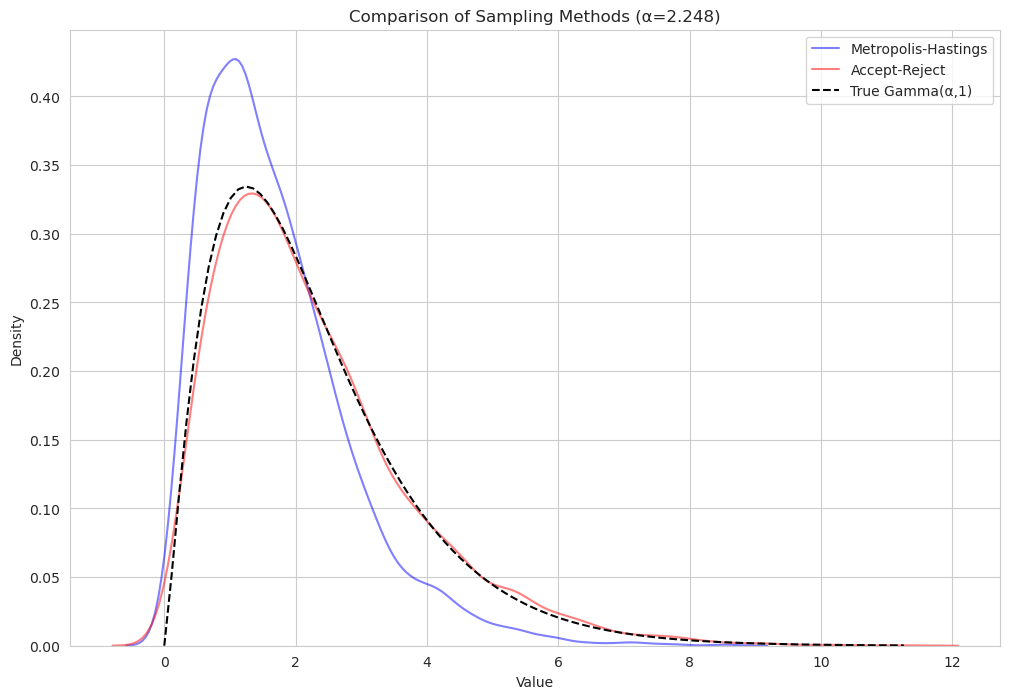

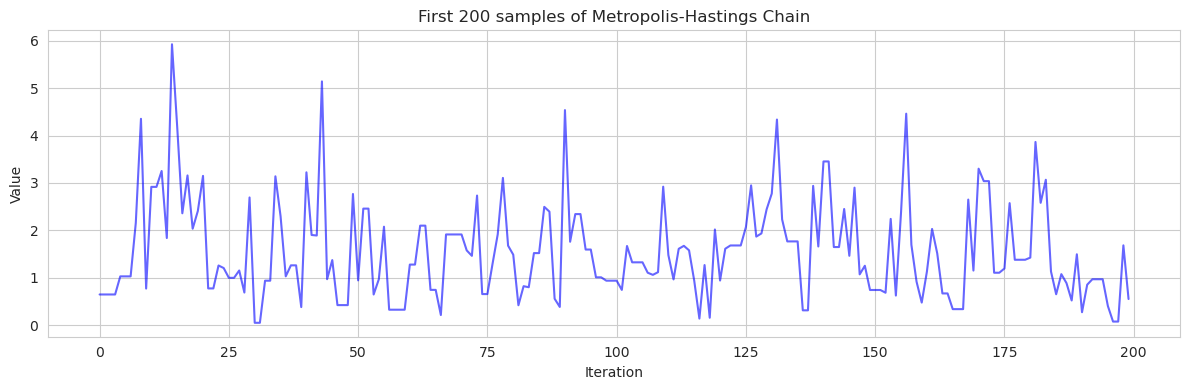


Summary Statistics:
Method               Mean       Variance  
----------------------------------------
Metropolis-Hastings  1.6876 1.2533
Accept-Reject        2.2675 2.2797
True Values          2.2480 2.2480


In [6]:
import math
import random
import seaborn as sns
import matplotlib.pyplot as plt
from typing import List, Tuple

def floor(x: float) -> int:
    """Simple floor function implementation"""
    return int(x // 1)

def exp(x: float) -> float:
    """Simple exponential function implementation"""
    return math.exp(x)

def generate_gamma_basic(k: int, theta: float) -> float:
    """Generate gamma random variable for integer k"""
    result = 0
    for _ in range(k):
        u = random.random()
        result -= theta * math.log(u)
    return result

def gamma_metropolis_hastings(alpha: float, n_samples: int, burn_in: int = 1000) -> List[float]:
    """Metropolis-Hastings algorithm for gamma sampling"""
    samples = []
    x_current = alpha
    alpha_floor = floor(alpha)
    
    for i in range(n_samples + burn_in):
        y = generate_gamma_basic(alpha_floor, alpha/alpha_floor)
        
        if x_current > 0 and y > 0:
            ratio = y / x_current
            exponent = alpha - alpha_floor
            exp_term = exp((x_current - y) / alpha)
            theta = min((ratio ** exponent) * exp_term, 1)
        else:
            theta = 0
        
        if random.random() < theta:
            x_current = y
            
        if i >= burn_in:
            samples.append(x_current)
    
    return samples

def gamma_accept_reject(alpha: float, n_samples: int) -> List[float]:
    """Accept-Reject algorithm for gamma sampling"""
    samples = []
    alpha_floor = floor(alpha)
    
    while len(samples) < n_samples:
        v = generate_gamma_basic(alpha_floor, alpha/alpha_floor)
        
        if v > 0:
            accept_prob = ((v/alpha) * exp(-v/alpha)) ** (alpha - alpha_floor)
        else:
            accept_prob = 0
        
        if random.random() < accept_prob:
            samples.append(v)
    
    return samples

def gamma_pdf(x: float, alpha: float) -> float:
    """Calculate gamma distribution PDF at point x"""
    if x <= 0:
        return 0
    return (x ** (alpha - 1)) * exp(-x) / math.gamma(alpha)

def plot_distributions(mh_samples: List[float], ar_samples: List[float], alpha: float):
    """Plot distributions using seaborn"""
    # Set the style
    sns.set_style("whitegrid")
    
    # Create main distribution plot
    plt.figure(figsize=(12, 8))
    
    # Plot the samples using seaborn's kdeplot
    sns.kdeplot(data=mh_samples, label='Metropolis-Hastings', color='blue', alpha=0.5)
    sns.kdeplot(data=ar_samples, label='Accept-Reject', color='red', alpha=0.5)
    
    # Add true distribution
    max_val = max(max(mh_samples), max(ar_samples))
    x_points = [i * max_val / 100 for i in range(101)]
    y_points = [gamma_pdf(x, alpha) for x in x_points]
    plt.plot(x_points, y_points, 'k--', label='True Gamma(α,1)')
    
    plt.title(f'Comparison of Sampling Methods (α={alpha})')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    
    # Create trace plot
    plt.figure(figsize=(12, 4))
    plt.plot(mh_samples[:200], color='blue', alpha=0.6)
    plt.title('First 200 samples of Metropolis-Hastings Chain')
    plt.xlabel('Iteration')
    plt.ylabel('Value')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

def calculate_statistics(samples: List[float]) -> Tuple[float, float]:
    """Calculate mean and variance of samples"""
    n = len(samples)
    if n == 0:
        return 0, 0
    
    mean = sum(samples) / n
    variance = sum((x - mean) ** 2 for x in samples) / (n - 1)
    return mean, variance

if __name__ == "__main__":
    # Set random seed for reproducibility
    random.seed(42)
    
    # Test parameters
    alpha = 2.248
    n_samples = 5000
    
    # Generate samples
    print(f"Generating samples for α = {alpha}...")
    mh_samples = gamma_metropolis_hastings(alpha, n_samples)
    ar_samples = gamma_accept_reject(alpha, n_samples)
    
    # Plot distributions
    plot_distributions(mh_samples, ar_samples, alpha)
    
    # Print statistics
    mh_mean, mh_var = calculate_statistics(mh_samples)
    ar_mean, ar_var = calculate_statistics(ar_samples)
    
    print("\nSummary Statistics:")
    print(f"{'Method':20} {'Mean':10} {'Variance':10}")
    print("-" * 40)
    print(f"{'Metropolis-Hastings':20} {mh_mean:.4f} {mh_var:.4f}")
    print(f"{'Accept-Reject':20} {ar_mean:.4f} {ar_var:.4f}")
    print(f"{'True Values':20} {alpha:.4f} {alpha:.4f}")

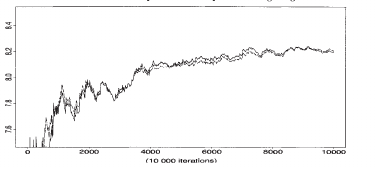
$$
Fig..2 $\quad$ Convergence to  $E_r[X^2] = 8.33 $ of Accept-Reject (full line) and Metropolis-Hastings (dots) estimators for  10,000  acceptances in [A.27], the same sequence o $y_i$  simulated from $ G_0(2.2/2.2/43)$  being used in [A.27] and [A.26]. \text{The final values of the estimators are  8.20  for [A.27] and  8.21  for [A.26].
$$

The number $t$ of values accepted by [4.27] is then random. Fig.1 describes the convergence of the estimators of $\mathbb{E}_{f}[X^{2}]$ associated with both algorithms for the same sequence of $y_{i}$'s and exhibits strong agreement between the approaches, with the estimator based on [4.26] being closer to the exact value 8.33 in this case.

On the other hand, the number $t$ of values accepted by [4.27] can be fixed and [4.26] can then use the resulting sample of random size as $y_{1},\ldots,y_{n}$. Fig.2 reproduces the comparison in this second case and exhibits a behavior rather similar to Fig.1, with another close agreement between estimators and, the scale being different, a smaller variance (which is due to the larger size of the effective sample).

Note, however, that both comparisons are biased. In the first case, the sample of $X^{n}$ produced by [4.27] does not have the distribution $f$ and, in the second case, the sample of $Y_{i}$'s in [4.26] is not iid. In both cases, this is due to the use of a stopping rule which modifies the distribution of the samples.

**Example .11. Logistic Regression.** We return to the data of Example .13, which described a logistic regression relating the failure of O-rings in shuttle flights to air temperature. We observe $(x_{i},y_{i})$, $i=1,\ldots,n$ according to the model

$$
Y_{i}\sim\text{Bernoulli}(p(x_{i})),\quad p(x)=\frac{\exp(\alpha+\beta x)}{1+ \exp(\alpha+\beta x)},
$$

where $p(x)$ is the probability of an O-ring failure at temperature \(x\). The likelihood is

$$
L(\alpha,\beta|y)\propto\prod_{i=1}^{n}\left(\frac{\exp(\alpha+\beta x_{i})}{1+ \exp(\alpha+\beta x_{i})}\right)^{x_{i}}\left(\frac{1}{1+\exp(\alpha+\beta x_{i})} \right)^{1-y_{i}}
$$

and we take the prior to be

$$
\pi_{\alpha}(\alpha|\hat{y})\pi_{\beta}(\beta)=\frac{1}{b}e^{\hat{\alpha}}e^{-\alpha ^{2}/b}d\alpha d\beta,
$$

which puts an exponential prior on $\log\alpha$ and a flat prior on $\beta$, and insures propriety of the posterior distribution (Problem 7.25). To complete the prior specification we must give a value for $b$, and we choose the data-dependent value that makes $\mathbb{E}\alpha=\hat{\alpha}$, where $\hat{\alpha}$ is the MLE of $\alpha$. (This also insures that the prior will not have undue influence, as it is now centered near the likelihood.) It can be shown that

$$
\mathbb{E}[\alpha]=\int_{0}^{\infty}\frac{1}{b}e^{\alpha}e^{-\alpha^{2}/b}d\alpha =\int_{0}^{\infty}\log(w)\frac{1}{b}e^{-w/\hat{\alpha}}dw=\log(b)-\gamma,
$$

where $\gamma$ is _Euler's Constant_, equal to $577216$. Thus we take $\hat{b}=e^{\hat{\alpha}+\gamma}$.

The posterior distribution is proportional to $L(\alpha,\beta|y)\pi(\alpha,\beta)$, and to simulate from this distribution we take an independent candidate

$$
g(\alpha,\beta)=\pi_{\alpha}(\alpha|\hat{y})g(\beta),
$$

where $\phi(\beta)$ is a normal distribution with mean $\hat{\beta}$ and variance $\hat{\sigma}_{\beta}^{2}$, the MLEs. Note that although basing the prior distribution on the data is somewhat in violation of the formal Bayesian paradigm, nothing is violated if the candidate depends on the data. In fact, this will usually result in a more effective simulation, as the candidate is placed close to the target.

Generating a random variable from $g(\alpha,\beta)$ is straightforward, as it only involves the generation of a normal and an exponential random variable. If we are at the point $(\alpha_{0},\beta_{0})$ in the Markov chain, and we generate $(\alpha^{\prime},\beta^{\prime})$ from $g(\alpha,\beta)$, we accept the candidate with probability

$$
\min\left\{\frac{L(\alpha^{\prime},\beta^{\prime}|y)}{L(\alpha_{0},\beta_{0}|y )}\frac{\phi(\beta_{0})}{\phi(\beta^{\prime})},1\right\}.
$$

Fig.3 shows the distribution of the generated parameters and their convergence.

**Example .12. Saddlepoint tail area approximation.** In Example 3.18, we saw an approximation to noncentral chi squared tail areas based on the regular and renormalized saddlepoint approximations. Such an approximation requires numerical integration, both to calculate the constant and to evaluate the tail area.

An alternative is to produce a sample $Z_{1},\ldots,Z_{m_{1}}$ from the saddlepoint distribution, and then approximate the tail area using

$$
P(\widehat{X}>a) =\int_{t(a)}^{1/2}\left(\frac{n}{2\pi}\right)^{1/2}\left[K_{X}^{ \prime}(t)\right]^{1/2}\exp\left\{n\left[K_{X}(t)-tK_{X}^{\prime}(t)\right]\right\} dt
$$

$$
\approx\frac{1}{m}\sum_{i=1}^{m}\left\|Z_{i}>f(a)\right\|\,,
$$

where $K_{X}(\tau)$ is the cumulant generating function of $X$ and $f(x)$ is the solution of the saddlepoint equation $K^{\prime}(f(x))-x$ (see Section 3.6.2).

Note that we are simulating from the transformed density. It is interesting (and useful) to note that we can easily derive an instrumental density to use in a Metropolis-Hastings algorithm. Using a Taylor series approximation, we find that

$$
\exp\left\{n\left[K_{X}(t)-tK_{X}^{\prime}(t)\right]\right\}\approx\exp\left\{- nK_{X}^{\prime\prime}(0)\frac{t^{2}}{2}\right\}\,,
$$

so a first choice for an instrumental density is the $\mathcal{N}(0,1/nK_{X}^{\prime\prime}(0))$ distribution (see Problem 7.26 for details). Booth et al. (1999) use a Student's $t$ approximation instead.

We can now simulate the noncentral chi squared tail areas using a normal instrumental density with $K_{X}^{\prime\prime}(t)=2[p(1-2t)+4\lambda)/(1-2t)$. The results are presented in Table 7, where we see that the approximations are quite good. Note that the same set of simulated random variables can be used for all the tail area probability calculations. Moreover, by using the Metropolis-Hastings algorithm, we can efficiently generate samples from the target distribution.

Fig.3: Estimation of the slope and intercept from the Challenger logistic regression. The top panels show histograms of the distribution of the coefficients, while the bottom panels show the convergence of the means.

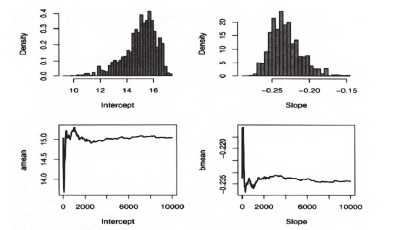

$$
\textbf{Fig.3.} \quad \text{Estimation of the slope and intercept from the Challenger logistic regression. The top panels show histograms of the distribution of the coefficients, while the bottom panels show the convergence of the means.}
$$


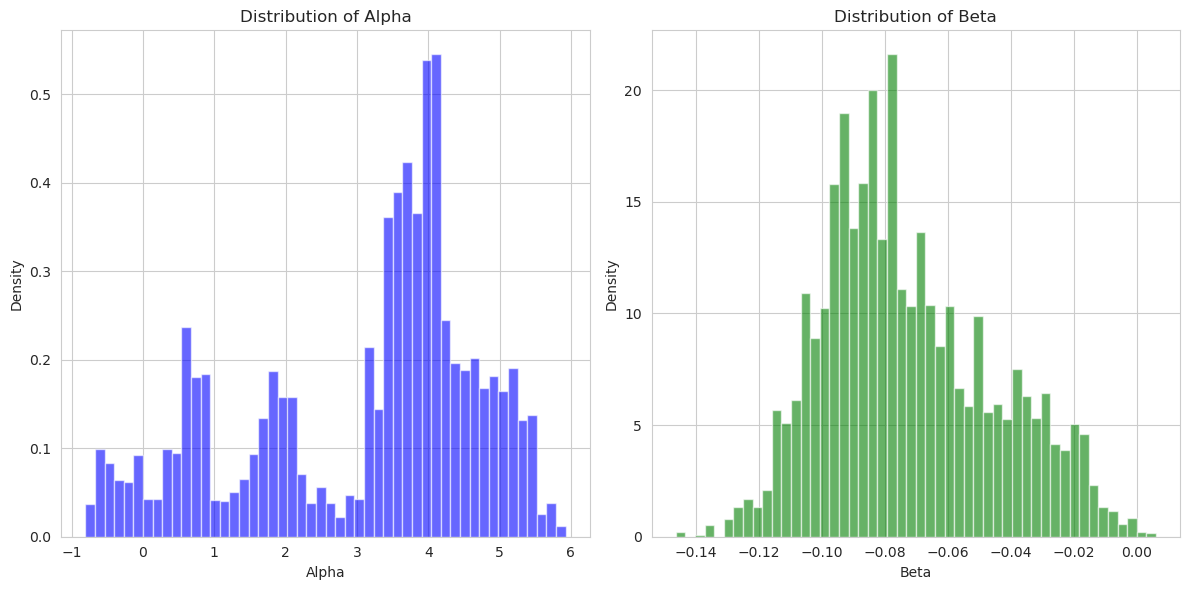

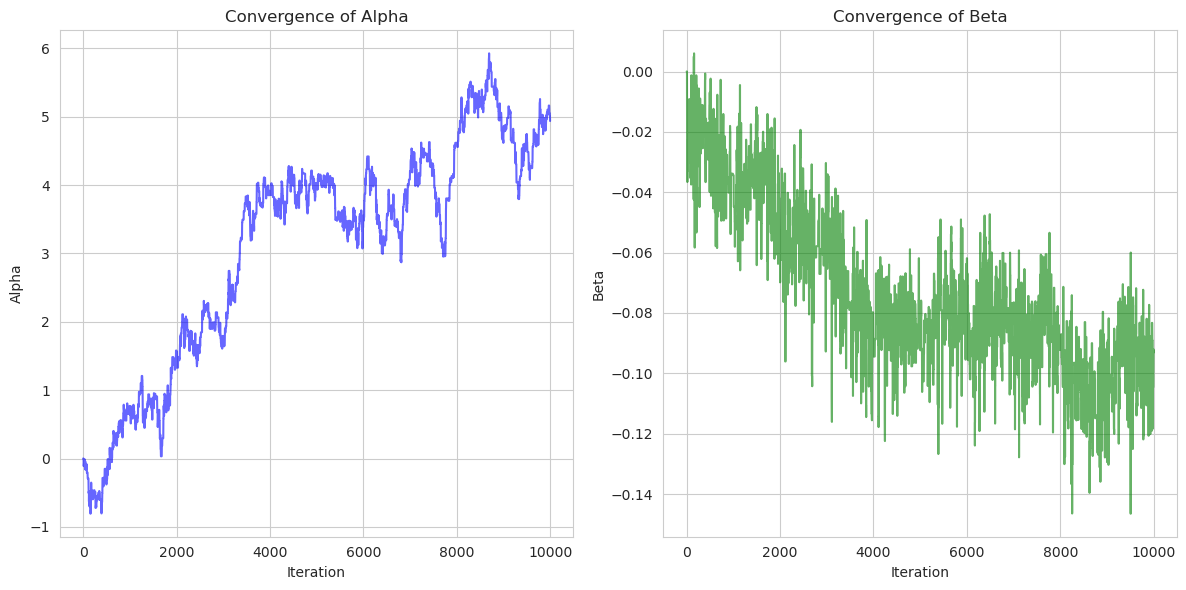

In [7]:
# Import required libraries
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

# Define the logistic regression model
def logistic_prob(x, alpha, beta):
    """Compute the probability of failure using the logistic function."""
    return np.exp(alpha + beta * x) / (1 + np.exp(alpha + beta * x))

def log_likelihood(alpha, beta, x, y):
    """Compute the log-likelihood for the logistic regression model."""
    p = logistic_prob(x, alpha, beta)
    return np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))

# Define the prior and proposal distributions
def prior_alpha(alpha, b):
    """Exponential prior for alpha."""
    return (1 / b) * np.exp(-alpha / b)

def prior_beta(beta):
    """Flat prior for beta."""
    return 1  # Uniform prior

def proposal_distribution(alpha_current, beta_current, alpha_sd, beta_sd):
    """Proposal distribution for alpha and beta (normal distribution)."""
    alpha_proposal = np.random.normal(alpha_current, alpha_sd)
    beta_proposal = np.random.normal(beta_current, beta_sd)
    return alpha_proposal, beta_proposal

# Implement the Metropolis-Hastings algorithm
def metropolis_hastings(x, y, alpha_init, beta_init, alpha_sd, beta_sd, b, num_samples):
    """Metropolis-Hastings algorithm for sampling from the posterior."""
    alpha_samples = []
    beta_samples = []
    alpha_current, beta_current = alpha_init, beta_init

    for _ in range(num_samples):
        # Propose new values
        alpha_proposal, beta_proposal = proposal_distribution(alpha_current, beta_current, alpha_sd, beta_sd)

        # Compute acceptance probability
        log_likelihood_current = log_likelihood(alpha_current, beta_current, x, y)
        log_likelihood_proposal = log_likelihood(alpha_proposal, beta_proposal, x, y)

        prior_current = prior_alpha(alpha_current, b) * prior_beta(beta_current)
        prior_proposal = prior_alpha(alpha_proposal, b) * prior_beta(beta_proposal)

        acceptance_prob = np.exp(log_likelihood_proposal - log_likelihood_current) * (prior_proposal / prior_current)

        # Accept or reject the proposal
        if np.random.rand() < acceptance_prob:
            alpha_current, beta_current = alpha_proposal, beta_proposal

        # Save samples
        alpha_samples.append(alpha_current)
        beta_samples.append(beta_current)

    return np.array(alpha_samples), np.array(beta_samples)

# Load data and run the algorithm
def main():
    # Example data (Challenger O-ring data)
    data = {
        'temperature': [53, 56, 57, 63, 66, 67, 68, 69, 70, 72, 73, 75, 76, 79, 81],
        'failure': [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    }
    df = pd.DataFrame(data)
    x = df['temperature'].values
    y = df['failure'].values

    # Parameters for the algorithm
    alpha_init = 0.0
    beta_init = 0.0
    alpha_sd = 0.1
    beta_sd = 0.1
    b = 1.0  # Hyperparameter for the prior
    num_samples = 10000

    # Run Metropolis-Hastings
    alpha_samples, beta_samples = metropolis_hastings(x, y, alpha_init, beta_init, alpha_sd, beta_sd, b, num_samples)

    # Visualize results
    plt.figure(figsize=(12, 6))

    # Plot histograms of the sampled parameters
    plt.subplot(1, 2, 1)
    plt.hist(alpha_samples, bins=50, density=True, alpha=0.6, color='blue')
    plt.title('Distribution of Alpha')
    plt.xlabel('Alpha')
    plt.ylabel('Density')

    plt.subplot(1, 2, 2)
    plt.hist(beta_samples, bins=50, density=True, alpha=0.6, color='green')
    plt.title('Distribution of Beta')
    plt.xlabel('Beta')
    plt.ylabel('Density')

    plt.tight_layout()
    plt.show()

    # Plot convergence of the parameters
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(alpha_samples, alpha=0.6, color='blue')
    plt.title('Convergence of Alpha')
    plt.xlabel('Iteration')
    plt.ylabel('Alpha')

    plt.subplot(1, 2, 2)
    plt.plot(beta_samples, alpha=0.6, color='green')
    plt.title('Convergence of Beta')
    plt.xlabel('Iteration')
    plt.ylabel('Beta')

    plt.tight_layout()
    plt.show()

# Run the main function
if __name__ == "__main__":
    main()

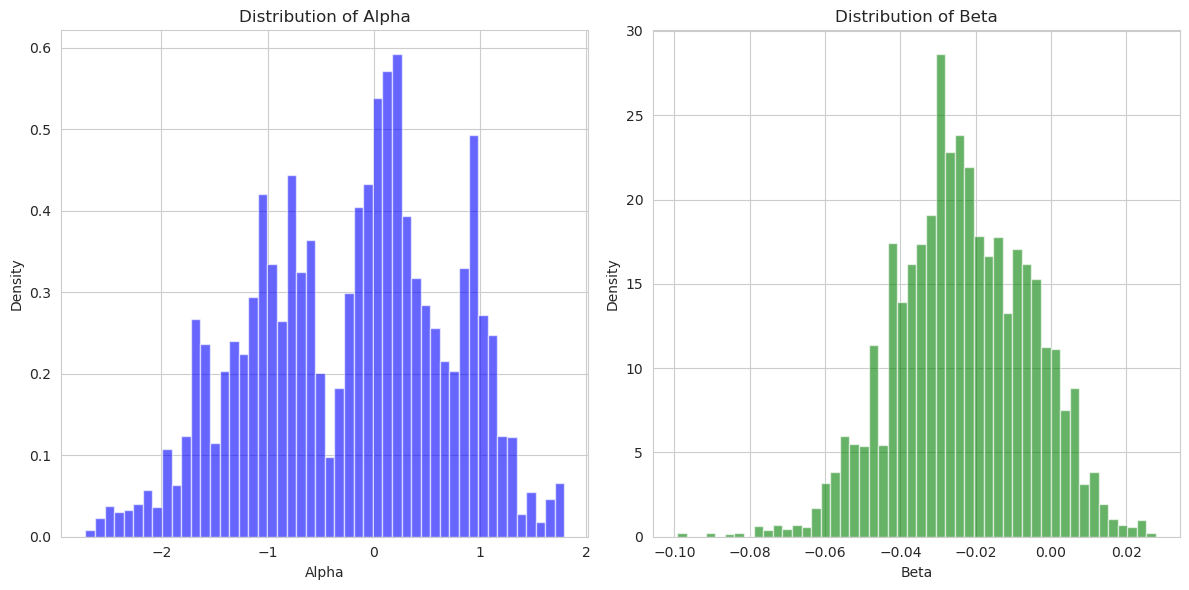

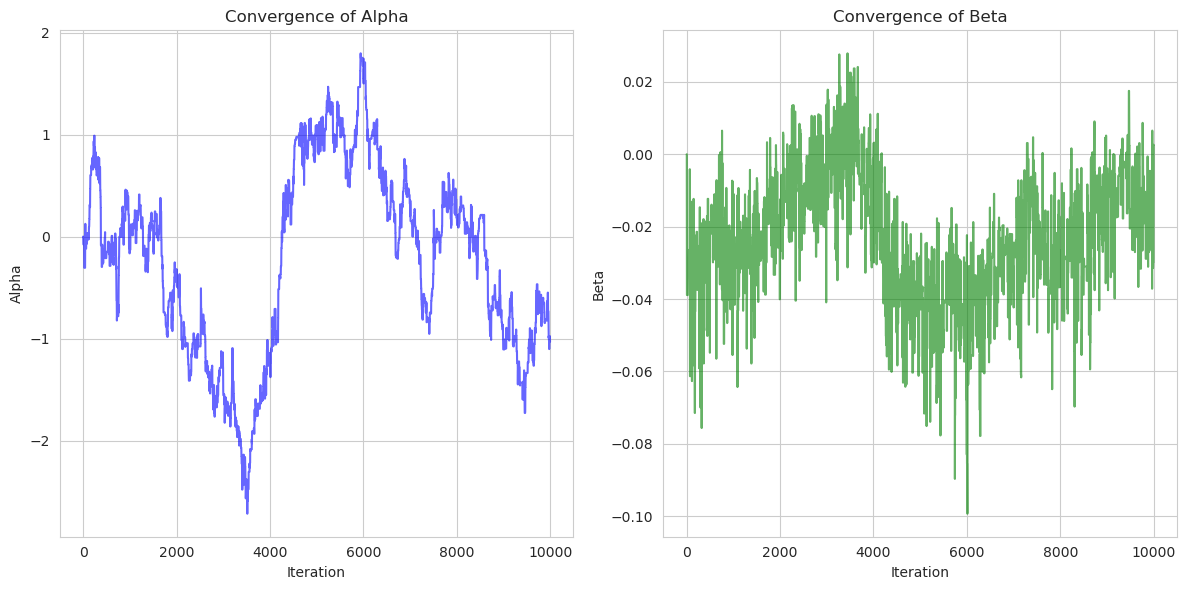

In [8]:
import random
import math
import matplotlib.pyplot as plt

# Define the logistic regression model
def logistic_prob(x, alpha, beta):
    """Compute the probability of failure using the logistic function."""
    return math.exp(alpha + beta * x) / (1 + math.exp(alpha + beta * x))

def log_likelihood(alpha, beta, x, y):
    """Compute the log-likelihood for the logistic regression model."""
    likelihood = 0.0
    for i in range(len(x)):
        p = logistic_prob(x[i], alpha, beta)
        likelihood += y[i] * math.log(p) + (1 - y[i]) * math.log(1 - p)
    return likelihood

# Define the prior and proposal distributions
def prior_alpha(alpha, b):
    """Exponential prior for alpha."""
    return (1 / b) * math.exp(-alpha / b)

def prior_beta(beta):
    """Flat prior for beta."""
    return 1  # Uniform prior

def proposal_distribution(alpha_current, beta_current, alpha_sd, beta_sd):
    """Proposal distribution for alpha and beta (normal distribution)."""
    alpha_proposal = random.gauss(alpha_current, alpha_sd)
    beta_proposal = random.gauss(beta_current, beta_sd)
    return alpha_proposal, beta_proposal

# Implement the Metropolis-Hastings algorithm
def metropolis_hastings(x, y, alpha_init, beta_init, alpha_sd, beta_sd, b, num_samples):
    """Metropolis-Hastings algorithm for sampling from the posterior."""
    alpha_samples = []
    beta_samples = []
    alpha_current, beta_current = alpha_init, beta_init

    for _ in range(num_samples):
        # Propose new values
        alpha_proposal, beta_proposal = proposal_distribution(alpha_current, beta_current, alpha_sd, beta_sd)

        # Compute acceptance probability
        log_likelihood_current = log_likelihood(alpha_current, beta_current, x, y)
        log_likelihood_proposal = log_likelihood(alpha_proposal, beta_proposal, x, y)

        prior_current = prior_alpha(alpha_current, b) * prior_beta(beta_current)
        prior_proposal = prior_alpha(alpha_proposal, b) * prior_beta(beta_proposal)

        acceptance_prob = math.exp(log_likelihood_proposal - log_likelihood_current) * (prior_proposal / prior_current)

        # Accept or reject the proposal
        if random.random() < acceptance_prob:
            alpha_current, beta_current = alpha_proposal, beta_proposal

        # Save samples
        alpha_samples.append(alpha_current)
        beta_samples.append(beta_current)

    return alpha_samples, beta_samples

# Load data and run the algorithm
def main():
    # Example data (Challenger O-ring data)
    temperature = [53, 56, 57, 63, 66, 67, 68, 69, 70, 72, 73, 75, 76, 79, 81]
    failure = [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

    # Parameters for the algorithm
    alpha_init = 0.0
    beta_init = 0.0
    alpha_sd = 0.1
    beta_sd = 0.1
    b = 1.0  # Hyperparameter for the prior
    num_samples = 10000

    # Run Metropolis-Hastings
    alpha_samples, beta_samples = metropolis_hastings(temperature, failure, alpha_init, beta_init, alpha_sd, beta_sd, b, num_samples)

    # Visualize results
    plt.figure(figsize=(12, 6))

    # Plot histograms of the sampled parameters
    plt.subplot(1, 2, 1)
    plt.hist(alpha_samples, bins=50, density=True, alpha=0.6, color='blue')
    plt.title('Distribution of Alpha')
    plt.xlabel('Alpha')
    plt.ylabel('Density')

    plt.subplot(1, 2, 2)
    plt.hist(beta_samples, bins=50, density=True, alpha=0.6, color='green')
    plt.title('Distribution of Beta')
    plt.xlabel('Beta')
    plt.ylabel('Density')

    plt.tight_layout()
    plt.show()

    # Plot convergence of the parameters
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(alpha_samples, alpha=0.6, color='blue')
    plt.title('Convergence of Alpha')
    plt.xlabel('Iteration')
    plt.ylabel('Alpha')

    plt.subplot(1, 2, 2)
    plt.plot(beta_samples, alpha=0.6, color='green')
    plt.title('Convergence of Beta')
    plt.xlabel('Iteration')
    plt.ylabel('Beta')

    plt.tight_layout()
    plt.show()

# Run the main function
if __name__ == "__main__":
    main()

Hastings algorithm, we have avoided calculating the normalizing constant for the saddlepoint approximation.

|| Interval | Renormalized | Exact | Monte Carlo ||
|---|---|---|---|---|
| | (36.225, $\infty$) | 0.0906 | 0.1 | 0.0992 |
| | (40.542, $\infty$) | 0.0497 | 0.05 | 0.0497 |
| | (49.333, $\infty$) | 0.0099 | 0.01 | 0.0098 |

Table 7.1. Monte Carlo saddlepoint approximation of a noncentral chi squared integral for p=6 and $\lambda$=9, based on 10,000 simulated random variables.

As an aside, note that the usual classification of "Hastings" for the algorithm [A.25] is somewhat inappropriate, since Hastings (1970) considers the algorithm (4.24) in general, using random walks (Section 7.5) rather than independent distributions in his examples. It is also interesting to recall that Hastings (1970) proposes a theoretical justification of these methods for finite state-space Markov chains based on the finite representation of real numbers in a computer. However, a complete justification of this physical discretization needs to take into account the effect of the approximation in the entire analysis. In particular, it needs to be verified that the computer choice of discrete approximation to the continuous distribution has no effect on the resulting stationary distribution or irreducibility of the chain. Since Hastings (1970) does not go into such detail, but keeps to the simulation level, we prefer to study the theoretical properties of these algorithms by bypassing the finite representation of numbers in a computer and by assuming flawless pseudo-random generators, namely algorithms producing variables which are uniformly distributed on [0, 1]. See Roberts et al. (1995) for a theoretical study of some effects of the computer discretization.

A final note about independent Metropolis-Hastings algorithms is that they cannot be omniscient: there are settings where an independent proposal does not work well because of the complexity of the target distribution. Since the main purpose of MCMC algorithms is to provide a crude but easy simulation technique, it is difficult to imagine spending a long time on the design of the proposal distribution. This is especially pertinent in high-dimensional models where the capture of the main features of the target distribution is most often impossible. There is therefore a limitation of the independent proposal, which can be perceived as a global proposal, and a need to use more local proposals that are not so sensitive to the target distribution, as presented in Section 7.5. Another possibility, developed in Section 7.6.3, is to validate adaptive algorithms that learn from the ongoing performances of the current proposals to refine their construction. But this solution is delicate, both from a theoretical ("Does ergodicity apply?") and an algorithmic ("How does one ...

tune the adaptation?") point of view. The following section first develops a specific kind of adaptive algorithm.

** A Metropolis-Hastings Version of ARS**

The ARS algorithm, which provides a general Accept-Reject method for log-concave densities in dimension one (see Section 2.4.2), can be generalized to the ARMS method (which stands for Adaptive Rejection Metropolis Sampling) following the approach developed by Gilks et al. (1995). This generalization applies to the simulation of arbitrary densities, instead of being restricted to log-concave densities as the ARS algorithm, by simply adapting the ARS algorithm for densities *f* that are not log-concave. The algorithm progressively fits a function *g*, which plays the role of a pseudo envelope of the density *f*. In general, this function *g* does not provide an upper bound on *f*, but the introduction of a Metropolis-Hastings step in the algorithm justifies the procedure.

Using the notation from Section 2.4.2, take *h(x) = log f(x)* with *f₁* proportional to the density *f*. For a sample $\mathcal{S}_{n} = \{x_i, 0 \le i \le n+1\}$, the equations of the lines between *(xᵢ, h(xᵢ))* and *(xᵢ₊₁, h(xᵢ₊₁))* denoted by *y = Lᵢ,ᵢ₊₁(x)*. Consider

$\tilde{h}_n(x) = \max\{L_{i-1, i}(x), L_{i, i+1}(x)\}$ for $x_i \le x < x_{i+1}$, with

$\tilde{h}_n(x) = L_{0, 1}(x)$ if $x < x_0$,

$\tilde{h}_n(x) = \max\{L_{0, 1}(x), L_{1, 2}(x)\}$ if $x_0 \le x < x_1$,

...

$\tilde{h}_n(x) = \max\{L_{n-1, n}(x), L_{n, n+1}(x)\}$ if $x_{n-1} \le x < x_n$,

$\tilde{h}_n(x) = L_{n, n+1}(x)$ if $x \ge x_{n+1}$.

and

The resulting proposal distribution is $g_n(x) \propto \exp\{\tilde{h}_n(x)\}$. The ARMS algorithm is based on $g_n$ and it can be decomposed into two parts, a first step which is a standard Accept-Reject step for the simulation from the instrumental distribution

$\psi_n(x) \propto \min\{f_1(x), \exp\{\tilde{h}_n(x)\}\}$,

based on $g_n$, and a second part, which is the acceptance of the simulated value by a Metropolis-Hastings procedure:

**Algorithm A.28 - ARMS Metropolis-Hastings -**

1. Simulate Y from $g_n(x^{(t)})$ and $U \sim U_{[0,1]}$ until $U \le \frac{f_1(Y)}{\psi_n(Y)} \exp\{\tilde{h}_n(Y)\}$.

2. Generate $V \sim U_{[0,1]}$ and take

**(7.15)  $X^{(t+1)} = \begin{cases} Y, & \text{if } V < \frac{f_1(Y) \psi_n(x^{(t)})}{f_1(x^{(t)}) \psi_n(Y)} \\ x^{(t)}, & \text{otherwise} \end{cases}$**   [A.28]

The Accept-Reject step indeed produces a variable distributed from $\psi_n(x)$ and this justifies the expression of the acceptance probability in the Metropolis-Hastings step. Note that [A.28] is a particular case of the approximate Accept-Reject algorithms considered by Tierney (1994) (see Problem 7.9). The probability (7.15) can also be written

$\min \left\{1, \frac{f_1(Y) \exp\{\tilde{h}_n(x^{(t)})\}}{f_1(x^{(t)}) \exp\{\tilde{h}_n(Y)\}} \right\}$ if $f_1(Y) > \exp\{\tilde{h}_n(Y)\}$,

$\min \left\{1, \frac{\exp\{\tilde{h}_n(x^{(t)})\}}{f_1(x^{(t)})} \right\}$ otherwise,

which implies a sure acceptance of Y when $f_1(x^{(t)}) < \exp\{\tilde{h}_n(x^{(t)})\}$, that is, when the bound is correct.

Each simulation of Y ~ $g_n$ in Step 1 of [A.28] provides, in addition, an update of $S_n$ in $S_{n+1} = S_n \cup \{Y\}$, and therefore of $g_n$, when Y is rejected. As in the case of the ARS algorithm, the initial $S_n$ set must be chosen so that $g_n$ is truly a probability density. If the support of *f* is not bounded from below, $L_{0,1}$ must be increasing and, similarly, if the support of *f* is not bounded from above, $L_{n,n+1}$ must be decreasing. Note also that the simulation of $g_n$ detailed in Section 2.4.2 is valid in this setting.

Since the algorithm [A.28] appears to be a particular case of Independent Metropolis-Hastings algorithm, the convergence and ergodicity results obtained in Section 7.4 should apply for [A.28]. This is not the case, however, because of the lack of time homogeneity of the chain (see Definition 6.4) produced by [A.28]. The transition kernel, based on $g_n$, can change at each step with a positive probability. Since the study of nonhomogeneous chains is quite delicate, the algorithm [A.28] can be justified only by reverting to the homogeneous case; that is, by fixing the function $g_n$ and the set $S_n$ after a warm-up period of length $n_0$. The constant $n_0$ need not be fixed in advance as this warm-up period can conclude when the approximation of *f* by $g_n$ is satisfactory, for instance when the rejection rate in Step 1 of [A.28] is sufficiently small. The algorithm [A.28] must then start with an initializing (or ...

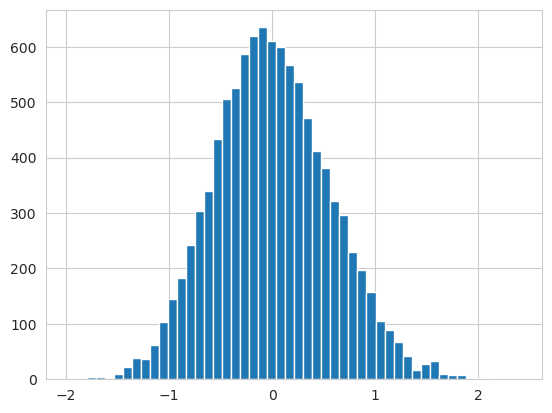

In [9]:
import numpy as np
import scipy.stats as stats

def arms_metropolis_hastings(f, f1, f1_x_t, h_tilde, x_initial, n_samples, burn_in=0):
    """
    Implements the ARMS Metropolis-Hastings algorithm.

    Args:
        f: The target density (unnormalized).
        f1: A function related to the target density (see text).
        f1_x_t: A function to calculate f1(x^(t)).
        h_tilde: The piecewise linear approximation function (h_n_tilde in the text).
        x_initial: The initial value for the chain.
        n_samples: The desired number of samples.
        burn_in: The number of initial samples to discard.

    Returns:
        A NumPy array of samples from the target distribution.
    """

    x_current = x_initial
    samples = []

    for _ in range(n_samples + burn_in):
        # Step 1: Simulate Y from g_n and U
        while True:
            Y = sample_from_g_n(h_tilde, x_current)  # See helper function below
            U = np.random.uniform()
            if U <= (f1(Y) / psi_n(h_tilde, x_current, Y)) * np.exp(h_tilde(Y)):
                break

        # Step 2: Metropolis-Hastings acceptance
        V = np.random.uniform()
        acceptance_ratio = (f1(Y) * psi_n(h_tilde, x_current, Y)) / (f1_x_t(x_current) * psi_n(h_tilde, x_current, Y))
        if V < min(1, acceptance_ratio):
            x_current = Y

        if _ >= burn_in:  # After burn-in period
            samples.append(x_current)

    return np.array(samples)


# Helper functions (you'll need to implement these based on your specific problem)

def sample_from_g_n(h_tilde, x_current):
    """
    Samples from the proposal distribution g_n (proportional to exp(h_tilde)).
    This will depend on the form of h_tilde (piecewise linear).  You might
    use inverse transform sampling or another suitable method.
    """
    # Example (replace with your actual sampling method):
    # This example assumes h_tilde is defined over a known interval.
    min_x = -10  # Replace with your minimum x
    max_x = 10   # Replace with your maximum x
    while True:
       x_proposed = np.random.uniform(min_x, max_x)
       if np.random.uniform() < np.exp(h_tilde(x_proposed) - h_tilde(x_current)): # Accept-reject
           return x_proposed
    

def psi_n(h_tilde, x_current, Y):
    """
    Calculates psi_n (the minimum of f1 and exp(h_tilde)).
    """
    return min(f1(x_current), np.exp(h_tilde(Y)))  # Corrected to use Y


# Example usage (replace with your actual functions and initial value)

def f(x):
    return np.exp(-x**2 / 2)  # Example: Standard normal (unnormalized)

def f1(x):
    return f(x)  # In this case, f1 can be equal to f

def f1_x_t(x):
    return f1(x)

def h_tilde(x):
    # Example piecewise linear function (replace with your actual h_tilde)
    if x < 0:
        return -x**2  # Example
    else:
        return -x     # Example

x_initial = 0
n_samples = 10000

samples = arms_metropolis_hastings(f, f1, f1_x_t, h_tilde, x_initial, n_samples, burn_in=1000)

# Analyze the samples (e.g., plot a histogram)
import matplotlib.pyplot as plt
plt.hist(samples, bins=50)
plt.show()

[-9.77732509751351, -9.77732509751351, 9.736808517875186, 9.609588385233128, 9.609588385233128, 9.609588385233128, 9.609588385233128, 9.609588385233128, 9.609588385233128, 9.609588385233128]


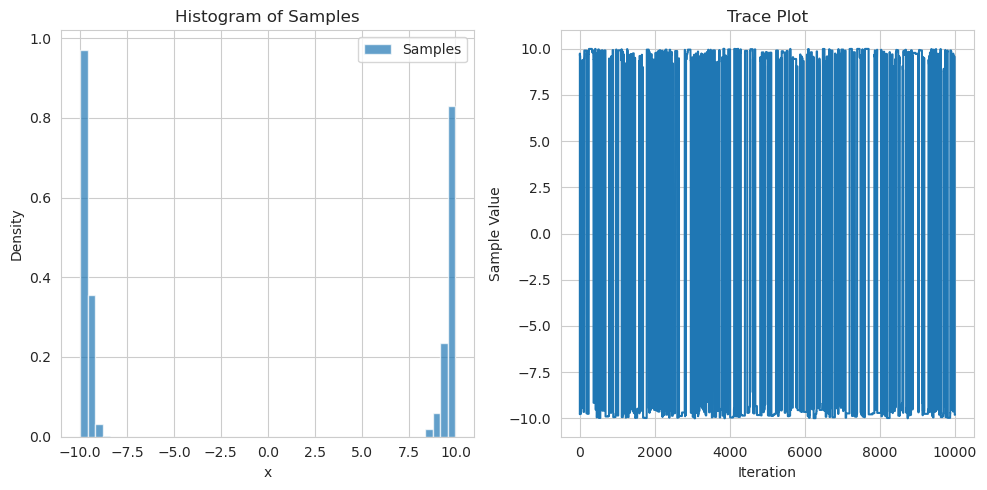

In [11]:
import random

def arms_metropolis_hastings(f, f1, f1_x_t, h_tilde, x_initial, n_samples, burn_in=0):
    """
    Implements the ARMS Metropolis-Hastings algorithm without NumPy.

    Args:
        (Same as before, but without NumPy dependencies)

    Returns:
        A list of samples from the target distribution.
    """

    x_current = x_initial
    samples = []

    for _ in range(n_samples + burn_in):
        # Step 1: Simulate Y from g_n and U
        while True:
            Y = sample_from_g_n(h_tilde, x_current)  # See helper function below
            U = random.random()  # Use random.random() for U ~ U(0, 1)
            if U <= (f1(Y) / psi_n(h_tilde, x_current, Y)) * my_exp(h_tilde(Y)): # Using my_exp
                break

        # Step 2: Metropolis-Hastings acceptance
        V = random.random()
        acceptance_ratio = (f1(Y) * psi_n(h_tilde, x_current, Y)) / (f1_x_t(x_current) * psi_n(h_tilde, x_current, Y))
        if V < min(1, acceptance_ratio):
            x_current = Y

        if _ >= burn_in:
            samples.append(x_current)

    return samples


# Helper functions (you'll need to implement these based on your specific problem)

def sample_from_g_n(h_tilde, x_current):
    """
    Samples from the proposal distribution g_n.
    (Implementation depends heavily on the form of h_tilde)
    """
    # Example (replace with your actual sampling method):
    min_x = -10  # Replace with your minimum x
    max_x = 10   # Replace with your maximum x
    while True:
       x_proposed = min_x + (max_x - min_x) * random.random() # Generate random in range
       if random.random() < my_exp(h_tilde(x_proposed) - h_tilde(x_current)): # Accept-reject with my_exp
           return x_proposed


def psi_n(h_tilde, x_current, Y):
    """
    Calculates psi_n.
    """
    return min(f1(x_current), my_exp(h_tilde(Y))) # Using my_exp


# My own exponential function implementation
def my_exp(x):
    result = 1.0
    for i in range(20): # Using a reasonable number of terms for approximation
        result += x**(i+1) / factorial(i+1)
    return result

def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n-1)

# Example usage (replace with your actual functions and initial value)

def f(x):
    return my_exp(-x*x / 2)  # Example: Standard normal (unnormalized) using my_exp

def f1(x):
    return f(x)  # In this case, f1 can be equal to f

def f1_x_t(x):
    return f1(x)

def h_tilde(x):
    # Example piecewise linear function (replace with your actual h_tilde)
    if x < 0:
        return -x*x  # Example
    else:
        return -x     # Example

x_initial = 0
n_samples = 10000

samples = arms_metropolis_hastings(f, f1, f1_x_t, h_tilde, x_initial, n_samples, burn_in=1000)

# Analyze the samples (e.g., calculate mean, variance, etc.)
# (You'll need to do this without NumPy)
print(samples[:10]) # Print the first 10 samples
# ... (Add your analysis code here)
# Plotting the results

# 1. Histogram
plt.figure(figsize=(10, 5))  # Adjust figure size as needed
plt.subplot(1, 2, 1)  # Create a subplot grid (1 row, 2 columns, first plot)
plt.hist(samples, bins=50, density=True, alpha=0.7, label="Samples")  # Adjust bins as needed
# If you know the true distribution, you can plot it for comparison:
# x = np.linspace(min(samples), max(samples), 100)  # Replace with appropriate range
# plt.plot(x, f(x)/np.sum(f(x)), 'r-', label="True Distribution")  # If f is unnormalized, normalize it

plt.title("Histogram of Samples")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()

# 2. Trace Plot
plt.subplot(1, 2, 2)  # Second plot in the grid
plt.plot(samples)
plt.title("Trace Plot")
plt.xlabel("Iteration")
plt.ylabel("Sample Value")

plt.tight_layout()  # Adjust subplot params for a tight layout
plt.show()


# ... (Add your analysis code here)
